# **Vaccum Cleaner Problem**

### **Problem Description**

<small style="font-size: 15px;">

**State Representation:** 

The vacuum cleaner agent operates in an N×N grid, where each tile may contain dust or be clean. Since each tile can have two possible states and the vacuum cleaner moves across the grid, the total number of possible world states depends on the grid size. 

**Initial State:**

Any grid with a random number of dusty tiles.

**Goal State:**  

All tiles in the N×N grid are cleaned.

**Actions:**  

The allowed actions involve,
- Move Right&nbsp;-&nbsp;When on an even numbered row, the vacuum cleaner moves left to right across that row.

- Move Left&nbsp;-&nbsp;When on an odd numbered row , the vacuum moves right to left across that row.

- Move Down&nbsp;-&nbsp;After finishing a row, the vacuum moves down to the next row.

- Suck&nbsp;-&nbsp;If the tile contains dust, the vacuum sucks the dust.

**Transition Model:**  

Given a current state and an action, the transition model returns the resulting new state after applying that action.

**Path Cost:**  

Each move has a uniform cost of 1. The total path cost is the total number of steps taken to traverse all tiles plus the number of suck actions performed to clean the dusty tiles, with each step and action contributing equally to the overall cost.

**Solution Approach:**  

The vacuum cleaner simulation operates within an N×N grid, where some tiles contain dust while others are clean. The objective is to systematically clean all dusty tiles by moving through the grid and removing dust. The board is initialized as a NumPy matrix, with each tile starting in a clean state. Dust is placed randomly based on user input, marking certain tiles as dirty. The cleaning process follows a fixed pattern, where the vacuum moves row by row, alternating directions to scan each tile. When dust is detected, it removes it and marks the tile as cleaned. The vacuum does not use AI-based decision making but follows predefined rules to complete the task. Once the entire grid is scanned, it resets to a fully cleaned state. This behavior represents a simple reflex agent, reacting only to current conditions without memory or adaptive learning. 

</small>

### **Implementation**

Enter the size of the grid (number of rows and columns): 
5


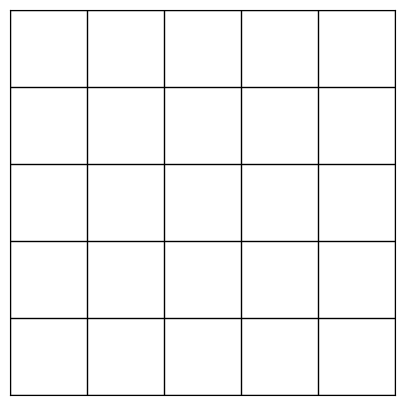

Board of size 5 is created.
How many tiles should have dust? (0-25): 
10


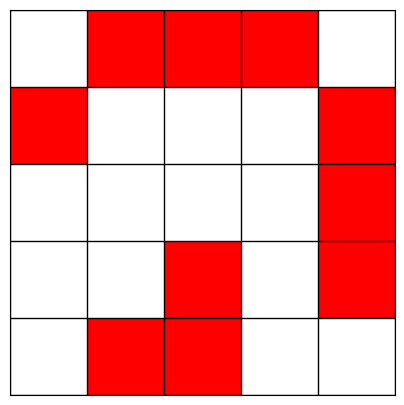

Dust added to 10 tiles on the board.
Tile 1 has no dust.
Vacuum cleaner is sucking the dust on tile 2.


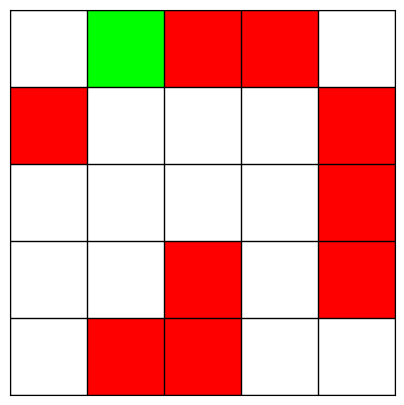

Tile 2 is cleaned.
Vacuum cleaner is sucking the dust on tile 3.


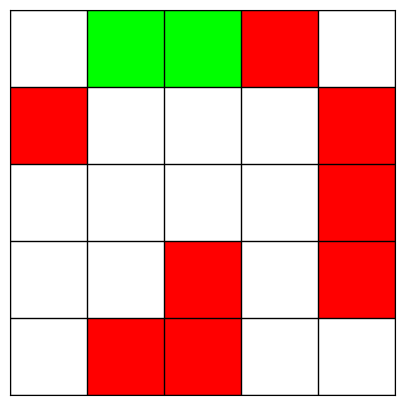

Tile 3 is cleaned.
Vacuum cleaner is sucking the dust on tile 4.


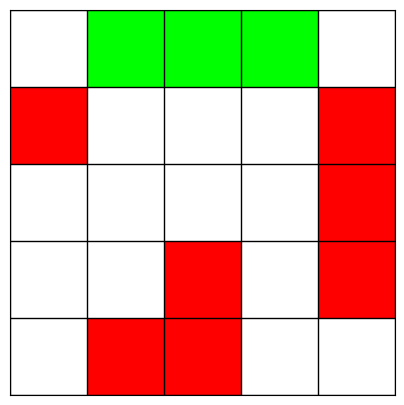

Tile 4 is cleaned.
Tile 5 has no dust.
Vacuum cleaner is sucking the dust on tile 10.


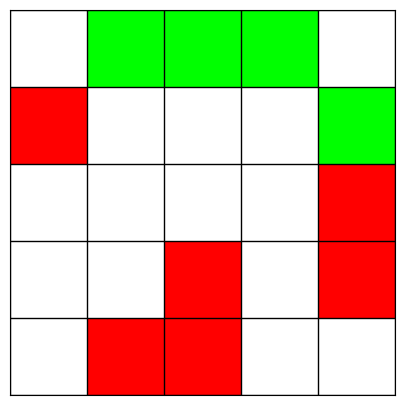

Tile 10 is cleaned.
Tile 9 has no dust.
Tile 8 has no dust.
Tile 7 has no dust.
Vacuum cleaner is sucking the dust on tile 6.


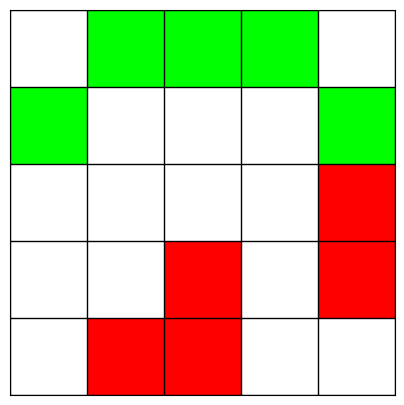

Tile 6 is cleaned.
Tile 11 has no dust.
Tile 12 has no dust.
Tile 13 has no dust.
Tile 14 has no dust.
Vacuum cleaner is sucking the dust on tile 15.


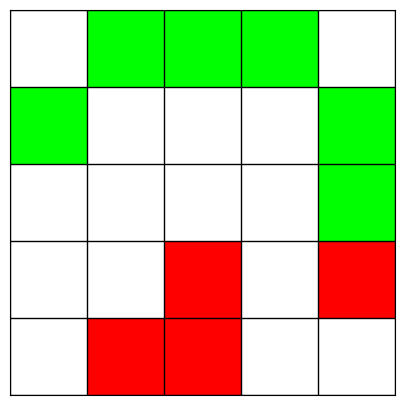

Tile 15 is cleaned.
Vacuum cleaner is sucking the dust on tile 20.


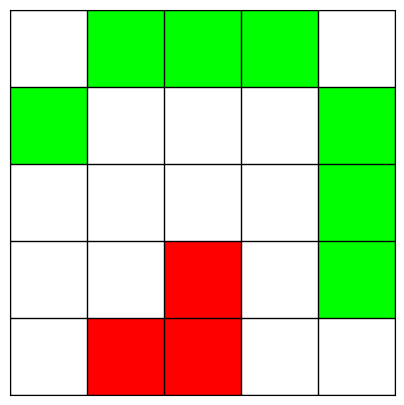

Tile 20 is cleaned.
Tile 19 has no dust.
Vacuum cleaner is sucking the dust on tile 18.


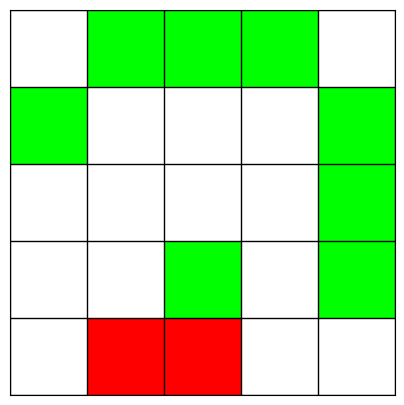

Tile 18 is cleaned.
Tile 17 has no dust.
Tile 16 has no dust.
Tile 21 has no dust.
Vacuum cleaner is sucking the dust on tile 22.


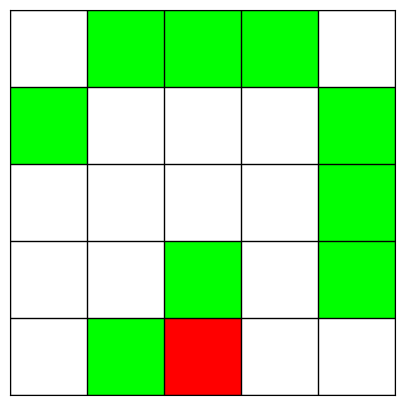

Tile 22 is cleaned.
Vacuum cleaner is sucking the dust on tile 23.


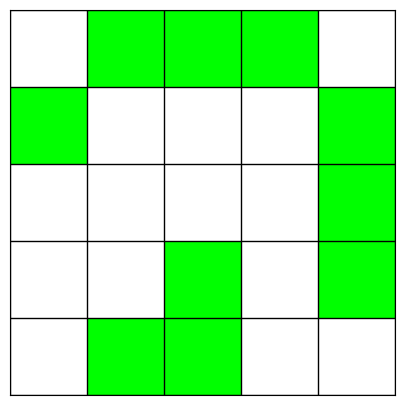

Tile 23 is cleaned.
Tile 24 has no dust.
Tile 25 has no dust.


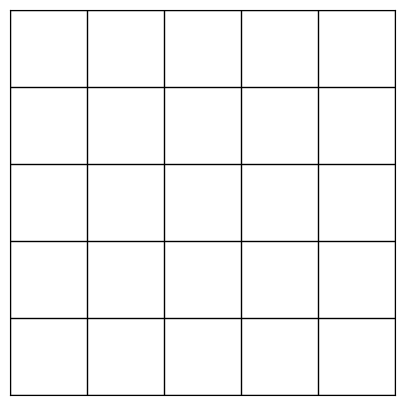

All tiles are cleaned.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    board_matrix = np.ones((size, size, 3))
    display_board(board_matrix, size)
    return board_matrix
def add_dust_to_board(board_matrix, size, dust_count):
    dust_positions = random.sample(range(size * size), dust_count)
    for pos in dust_positions:
        row = pos // size
        col = pos % size
        board_matrix[row, col] = [1, 0, 0] 
    display_board(board_matrix, size)
    return board_matrix
def clean_tiles(board_matrix, size):
    for row in range(size):
        cols = range(size) if row % 2 == 0 else range(size - 1, -1, -1)
        for col in cols:
            tile_index = row * size + col + 1
            if np.array_equal(board_matrix[row, col], [1, 0, 0]): 
                print(f"Vacuum cleaner is sucking the dust on tile {tile_index}.")
                board_matrix[row, col] = [0, 1, 0] 
                display_board(board_matrix, size)
                print(f"Tile {tile_index} is cleaned.")
            elif np.array_equal(board_matrix[row, col], [1, 1, 1]): 
                print(f"Tile {tile_index} has no dust.")
            elif np.array_equal(board_matrix[row, col], [0, 1, 0]):  
                print(f"Tile {tile_index} is already cleaned.")
    for row in range(size):
        for col in range(size):
            if np.array_equal(board_matrix[row, col], [0, 1, 0]):
                board_matrix[row, col] = [1, 1, 1]
    display_board(board_matrix, size)
    return board_matrix
try:
    print("Enter the size of the grid (number of rows and columns): ")
    size = int(input())
    print(size)
    if size > 0:
        board_matrix = create_empty_board(size)
        print(f"Board of size {size} is created.")
        try:
            print(f"How many tiles should have dust? (0-{size * size}): ")
            dust_count = int(input())
            print(dust_count)
            if 0 <= dust_count <= size * size:
                board_matrix = add_dust_to_board(board_matrix, size, dust_count)
                print(f"Dust added to {dust_count} tiles on the board.")
                board_matrix = clean_tiles(board_matrix, size)
                print(f"All tiles are cleaned.")
            else:
                print(f"Invalid dust count. Please enter a number between 0 and {size * size}.")
        except ValueError:
            print("Invalid input. Please enter a valid integer for dust count.")
    else:
        print("Invalid input. Please enter a positive integer.")
except ValueError:
    print("Invalid input. Please enter a valid integer.")